In [3]:
import numpy as np
import matplotlib.pyplot as plt

### CCO50- Digital Speech Processing  
# Short Test 7

**Description:** Design an FIR filter with the following specifications:

 $ 0.99 \leq  |H(e^{j\omega})| \leq 1.01 $, in the range $0 \leq \omega\leq 0.15\pi $

$ |H(e^{j\omega})| \leq 0.06$, in the range $0.45\pi \leq \omega\leq \pi $

Then, normalize the windowed filter and write down the difference equation to implement the filter you have just designed in a computer based application.

First, lets discover the filter order lloking to the fluctuation in the passage band and in rejection band:

$1.01 - 0.99 = 0.02$ is the passage band fluctuation;

$0.06$ is the rejection fluctuation;

The most restrictive is $0.02$ so lets calculate the equivalent decibels;

$20 \cdot \log{0.02} = -33,98dB$

Now, check in the table which window fits best

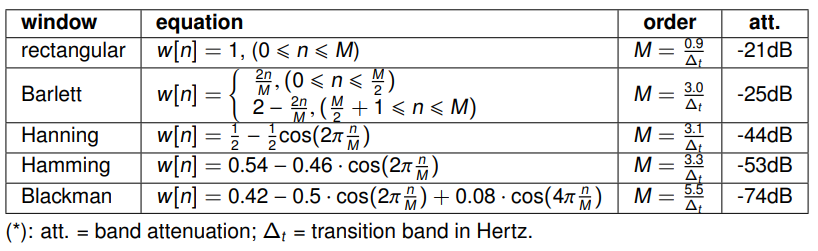

It is Hanning, so the order is:

$M = \frac{3.1}{\Delta t} $

$\Delta t$ is the transition width in Hz.

Our transition width is $\omega = 0.45\pi - 0.15\pi = 0.3\pi$, in Hz.

$\omega = 2\pi f$ 

$f = \frac{\omega}{2 \pi} = \frac{0.3\pi}{2\pi} = 0.15$

$M = \frac{3.1}{0.15} \approx 20$

Now, checking the half of the cutting band, that will be our $\omega_c$: 

it can be achieved by summing the start of the cutting band and the half of the difference of the start and the end of the cutting band:

$\omega_c = 0.15\pi + 0.15\pi = 0.3\pi$

Now, with all of the parameters defined, lets start the filter implementation!

$$
h[n] = \frac{\sin{(\omega_c (n - \frac{M}{2}))}}{\pi (n - \frac{M}{2})}
$$

$$
h[n] = \frac{\sin{(0.3\pi (n - \frac{20}{2}))}}{\pi (n - \frac{20}{2})}, \quad 0 \leq n \leq 20
\\
h[n] \leftarrow h[n] \cdot w[n], \quad \text{where} 
\\
w[n] = \frac{1}{2} - \frac{1}{2} \cos{(\frac{2\pi n}{20})}
$$



In [ ]:
M = 20
omega = 0.3

def low_pass_with_hanning(M, omega):
    h = np.zeros(M+1)
    w = np.zeros(M+1)

    for n in range(M+1):
        h[n] = (np.sin(np.pi * omega * (n - (M/2)))/(np.pi * (n - (M/2)))) if n != M/2 else omega
        w[n] = 0.5 - 0.5 * np.cos(2 * np.pi * n / M)
        h[n] = h[n] * w[n]
    return h

h = low_pass_with_hanning(M, omega)

print(f"h[n]: {h}")

h[n]: [ 0.          0.00070021  0.00361353  0.0028962  -0.01077345 -0.03183099
 -0.03061428  0.02602993  0.13691124  0.25121619  0.3         0.25121619
  0.13691124  0.02602993 -0.03061428 -0.03183099 -0.01077345  0.0028962
  0.00361353  0.00070021  0.        ]


In [7]:
def print_difference_equation(h):
    coefficients = [f"{coef:.4f}" for coef in h]
    equation = "y[n] = " + " + ".join([f"({coeff})x[n-{i}]" for i, coeff in enumerate(coefficients)])
    print(equation)

print_difference_equation(h)

y[n] = (0.0000)x[n-0] + (0.0007)x[n-1] + (0.0036)x[n-2] + (0.0029)x[n-3] + (-0.0108)x[n-4] + (-0.0318)x[n-5] + (-0.0306)x[n-6] + (0.0260)x[n-7] + (0.1369)x[n-8] + (0.2512)x[n-9] + (0.3000)x[n-10] + (0.2512)x[n-11] + (0.1369)x[n-12] + (0.0260)x[n-13] + (-0.0306)x[n-14] + (-0.0318)x[n-15] + (-0.0108)x[n-16] + (0.0029)x[n-17] + (0.0036)x[n-18] + (0.0007)x[n-19] + (0.0000)x[n-20]


$
y[n] = (0.0007)x[n-1] + (0.0036)x[n-2] + (0.0029)x[n-3] + (-0.0108)x[n-4] + (-0.0318)x[n-5] + (-0.0306)x[n-6] + (0.0260)x[n-7] + (0.1369)x[n-8] + (0.2512)x[n-9] + (0.3000)x[n-10] + (0.2512)x[n-11] + (0.1369)x[n-12] + (0.0260)x[n-13] + (-0.0306)x[n-14] + (-0.0318)x[n-15] + (-0.0108)x[n-16] + (0.0029)x[n-17] + (0.0036)x[n-18] + (0.0007)x[n-19]
$

# Plotting the graph

In [15]:
def z_transform(x, num_points=1000):
    omega = np.linspace(0, np.pi, num_points)
    z = np.exp(1j * omega)
    X_z = np.zeros_like(z, dtype=complex)
    N = len(x)
    for k in range(N):
        X_z += x[k] * z**(-k)
    return omega, X_z

def plot_z_transform(omega, G_z, name="G[z]", start_cut_band=0.15, end_cut_band=0.45):
    plt.plot(omega, np.abs(G_z), label="|H(z)|")
    plt.axvline(x=start_cut_band * np.pi, color='green', linestyle='--', label=f"Start Cut Band ({start_cut_band}π)")
    plt.axvline(x=end_cut_band * np.pi, color='green', linestyle='--', label=f"End Cut Band ({end_cut_band}π)")
    plt.title(f'Z-Transform of {name}')
    plt.xlabel('Frequency (omega)')
    plt.ylabel('|H(z)|')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

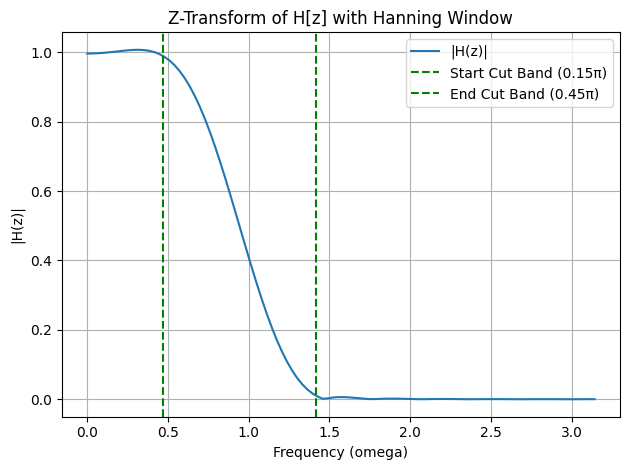

In [16]:
omega, Q_z = z_transform(h, 100)
plot_z_transform(omega, Q_z, name="H[z] with Hanning Window")